In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
pd.set_option('display.max_columns', None)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

# Emissões de $CO_2$

CO₂ emissions; CO₂ direct and indirect emissions per unit of output by industry and by country. CO₂ emissions by industry, in aggregate terms and in terms of output by industry

In [2]:
df = pd.read_csv("emissoes_co2.csv")

In [3]:
relevant_cols = [
    "Country",
    "Indicator",
    "Industry",
    "Unit",
]
relevant_cols.extend([f"F{i}" for i in range(1995, 2019)])

df_rel = df[relevant_cols]

In [4]:
df_gr = df_rel.groupby(["Country", "Unit"]).sum([f"F{i}" for i in range(1995, 2019)]).reset_index()

In [5]:
good_countries = [
    "Brazil",
    "Argentina",
    "United States",
    "China, P.R.: Mainland",
    "Russian Federation",
    "India"
]

colors = [
    "green",
    "gold",
    "blue",
    "red",
    "purple",
    "black"
]

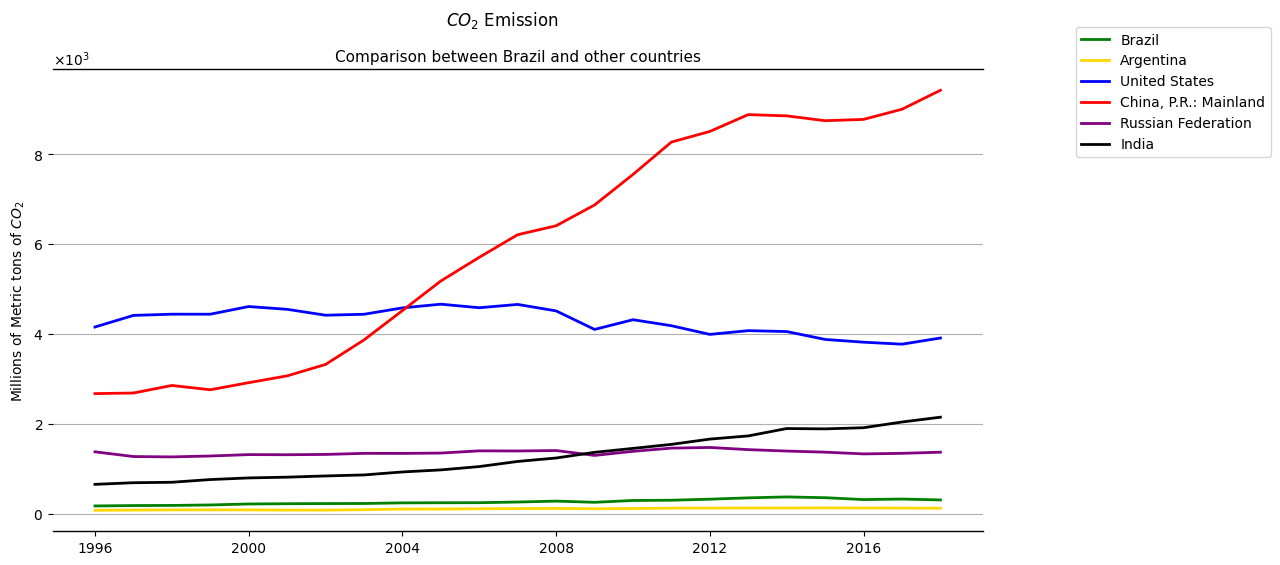

In [6]:
to_plot_carbon = df_gr.loc[
    (df_gr["Unit"] == "Millions of Metric tons of CO2")
]

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("$CO_2$ Emission", fontsize=12)

ax.set_title("Comparison between Brazil and other countries",  fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel("Millions of Metric tons of $CO_2$")
ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

for col, country in zip(colors, good_countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=country, linewidth=2.0, color=col)    
    ax.legend(loc=[1.1, 0.81])

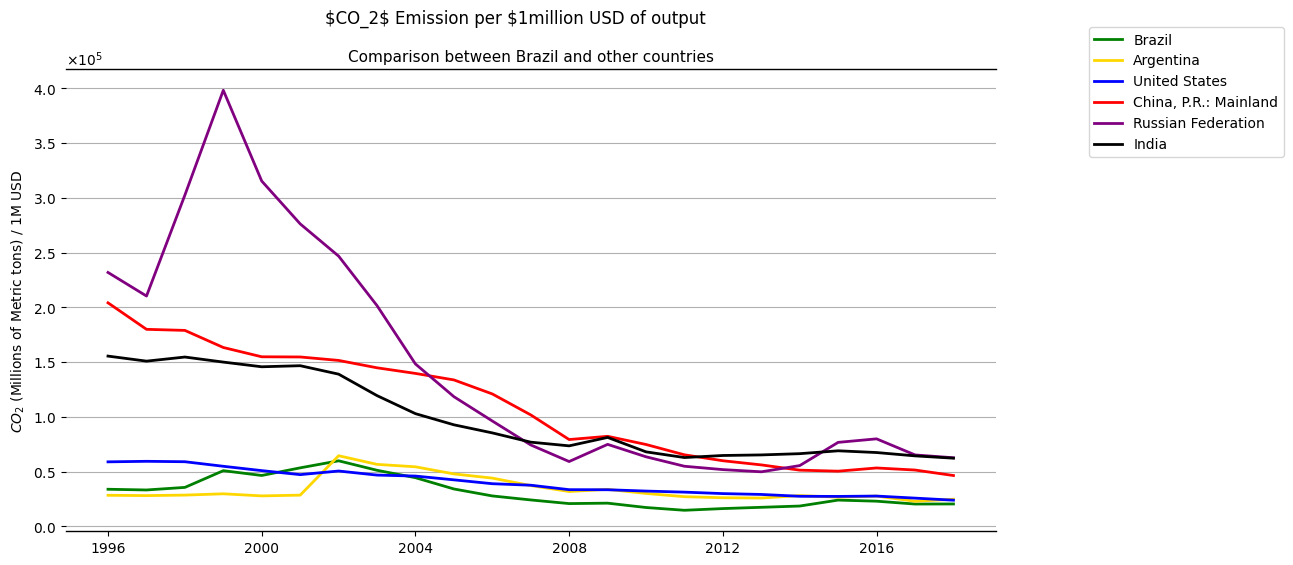

In [7]:
to_plot_carbon = df_gr.loc[
    (df_gr["Unit"] == "Metric Tons of CO2 Emissions per $1million USD of output")
]

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("$CO_2$ Emission per $1million USD of output", fontsize=12)

ax.set_title("Comparison between Brazil and other countries",  fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel("$CO_2$ (Millions of Metric tons) / 1M USD")
ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

for col, country in zip(colors, good_countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=country, linewidth=2.0, color=col)    
    ax.legend(loc=[1.1, 0.81])

# Os processos de produção de riquezas ficaram mais sustentáveis

In [8]:
df_gr_ind = df_rel.groupby(["Country", "Unit", "Industry"]).sum([f"F{i}" for i in range(1995, 2019)]).reset_index()

In [9]:
to_plot_carbon = df_gr_ind.loc[
    (df_gr_ind["Unit"] == "Millions of Metric tons of CO2") &\
    (df_gr_ind["Country"] == "Brazil")
]

In [10]:
most_emissions_id = to_plot_carbon.T.iloc[3:, :].sum().sort_values(ascending=False).head().index

In [11]:
ind_list = to_plot_carbon.loc[most_emissions_id, :].Industry.unique()

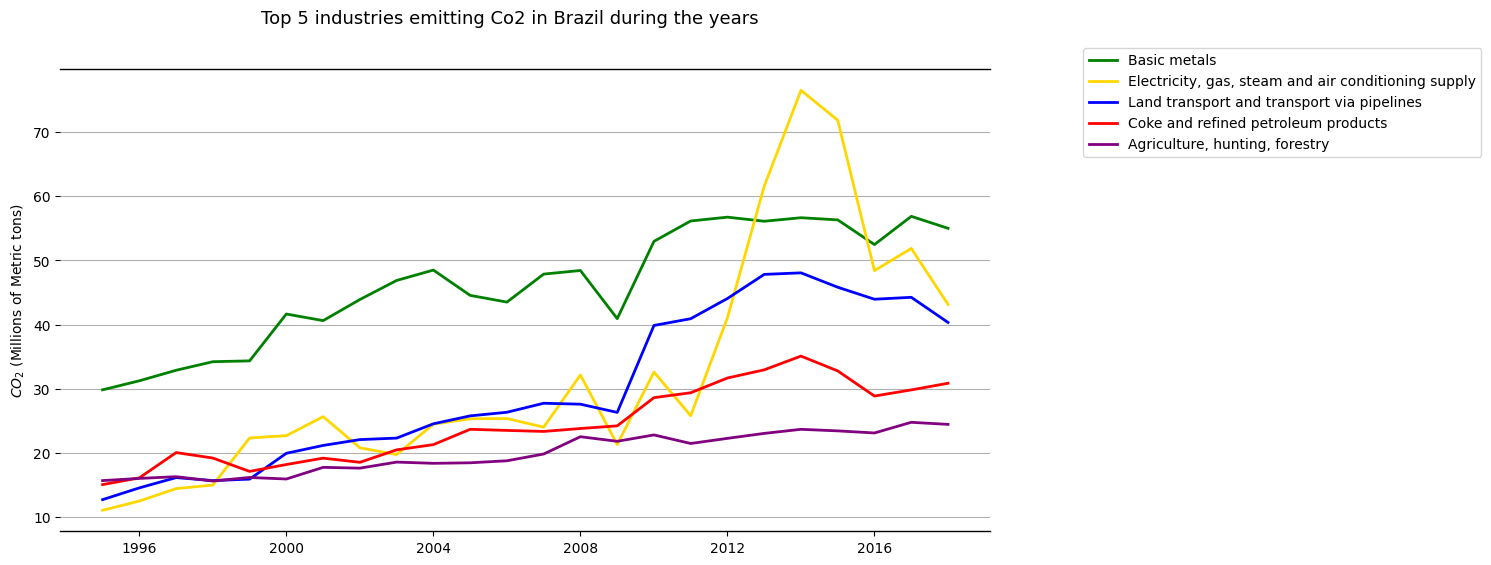

In [12]:

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Top 5 industries emitting Co2 in Brazil during the years", fontsize=13)

# ax.set_title("Comparison between industrial services",  fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel("$CO_2$ (Millions of Metric tons)")
# ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

for col, ind in zip(colors, ind_list):
    to_plot = to_plot_carbon.query(f"Industry == '{ind}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=ind, linewidth=2.0, color=col)    
    ax.legend(loc=[1.1, 0.81])

# Os processos de produção de riquezas ficaram mais sustentáveis

# Forest and Carbon

Carbon sequestration is essential to mitigate global climate change. Forest ecosystems determine global climate change by removing or adding greenhouse gases such as CO2 from the atmosphere.

In [13]:
df2 = pd.read_csv("floresta_e_carbono_POTENCIAL.csv")

In [14]:
relevant_cols = [
    "Country",
    "Indicator",
    "Unit"
]
relevant_cols.extend([f"F{i}" for i in range(1992, 2021)])

df2_rel = df2[relevant_cols]

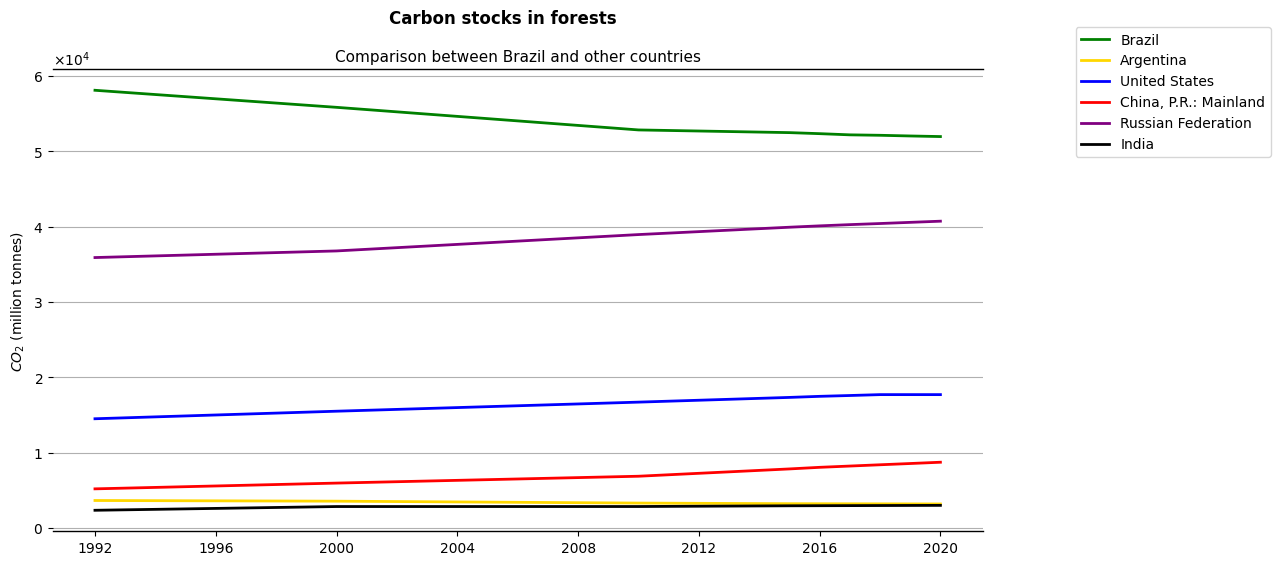

In [15]:
metric = "Carbon stocks in forests"
metric_unit = "$CO_2$ (million tonnes)"

to_plot_carbon = df2_rel.loc[
    (df2_rel["Indicator"] == metric)
]

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle(metric, fontsize=12, fontweight ='bold')

ax.set_title("Comparison between Brazil and other countries",  fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel(metric_unit)
ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

for col, country in zip(colors, good_countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, 0]
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    ax.plot(x, y, "-", label=country, linewidth=2.0, color=col)    
    ax.legend(loc=[1.1, 0.81])


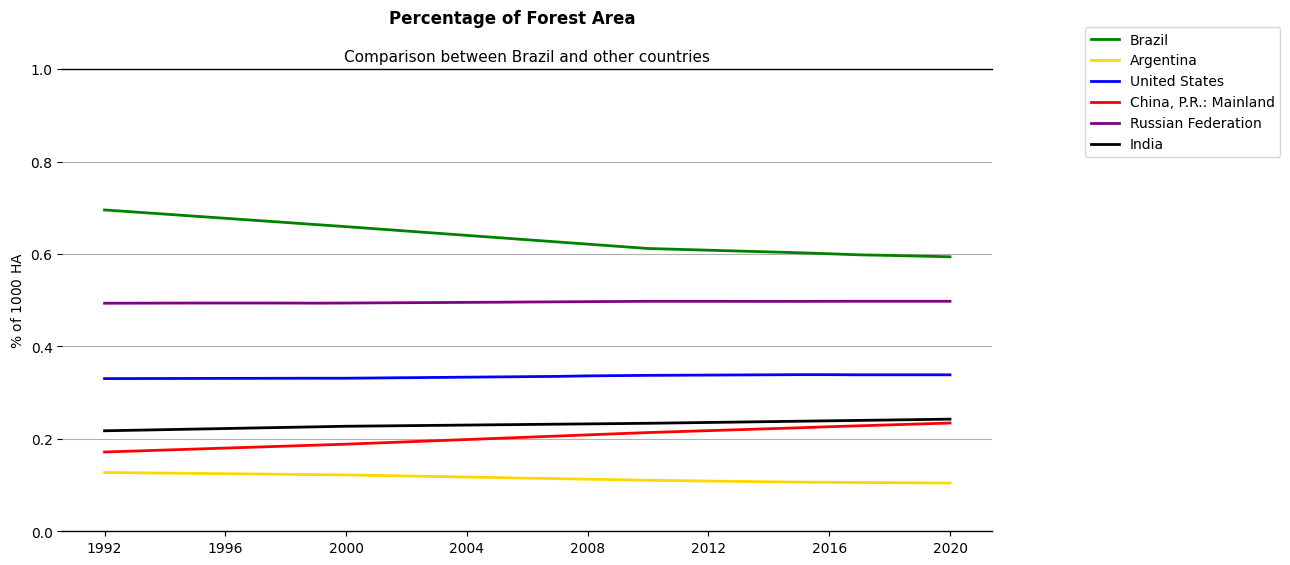

In [16]:

metric = "Forest area"
metric2 = "Land area"
metric_unit = "$\%$ of $1000$ HA"

to_plot_carbon = df2_rel.loc[
    (df2_rel["Indicator"] == metric) | (df2_rel["Indicator"] == metric2)
]

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Percentage of Forest Area", fontsize=12, fontweight ='bold')

ax.set_title("Comparison between Brazil and other countries",  fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel(metric_unit)
ax.set_ylim(0, 1)
# ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

for col, country in zip(colors, good_countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, :]    
    to_plot.rename(columns = dict(zip(to_plot.columns, [metric, metric2])), inplace=True)
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    
    perc_forest_area = y[:, 0] / y[:, 1]
    ax.plot(x, perc_forest_area, "-", label=country, linewidth=2.0, color=col)    
    ax.legend(loc=[1.1, 0.81])
    


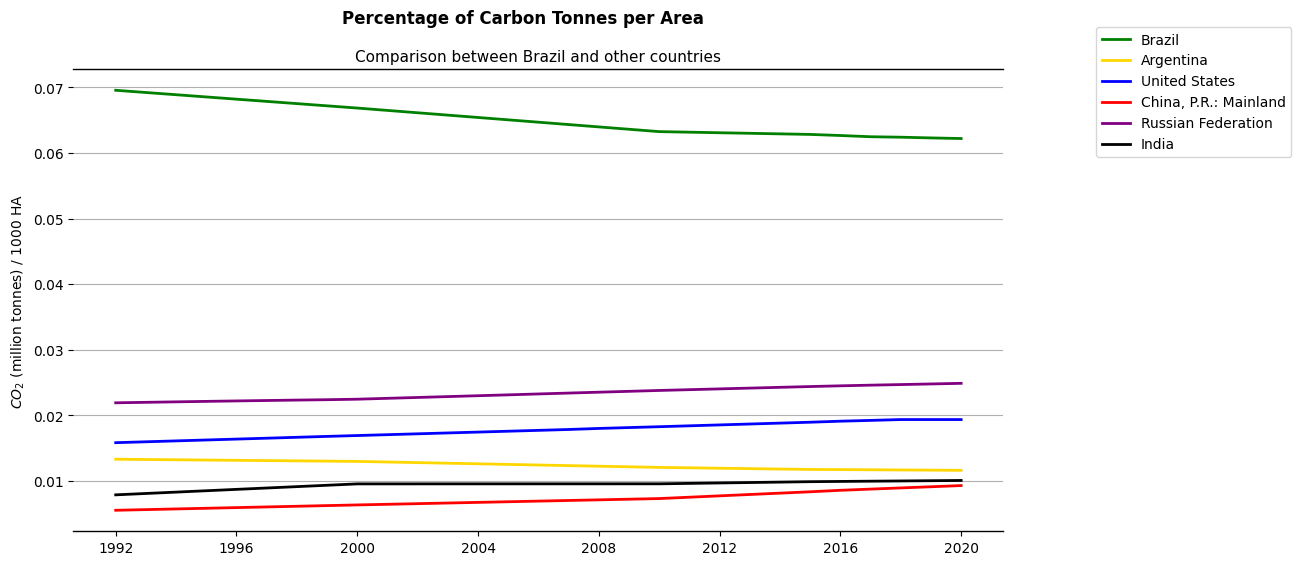

In [17]:
metric = "Carbon stocks in forests"
metric2 = "Land area"
metric_unit = "$CO_2$ (million tonnes) / $1000$ HA"


to_plot_carbon = df2_rel.loc[
    (df2_rel["Indicator"] == metric) | (df2_rel["Indicator"] == metric2)
]

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Percentage of Carbon Tonnes per Area", fontsize=12, fontweight ='bold')

ax.set_title("Comparison between Brazil and other countries",  fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel(metric_unit)
# ax.set_ylim(0, 1)
# ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

for col, country in zip(colors, good_countries):
    to_plot = to_plot_carbon.query(f"Country == '{country}'").T.iloc[3:, :]    
    to_plot.rename(columns = dict(zip(to_plot.columns, [metric, metric2])), inplace=True)
    x = pd.to_datetime(to_plot.index.str[1:])
    y = to_plot.values
    
    perc_forest_area = y[:, 0] / y[:, 1]
    ax.plot(x, perc_forest_area, "-", label=country, linewidth=2.0, color=col)    
    ax.legend(loc=[1.1, 0.81])
    


## Bonus

In [18]:
to_plot_carbon = df_gr_ind.loc[
    (df_gr_ind["Unit"] == "Millions of Metric tons of CO2") &\
    (df_gr_ind["Country"] == "United States") &\
    (df_gr_ind["Industry"] == "Paper products and printing")
]

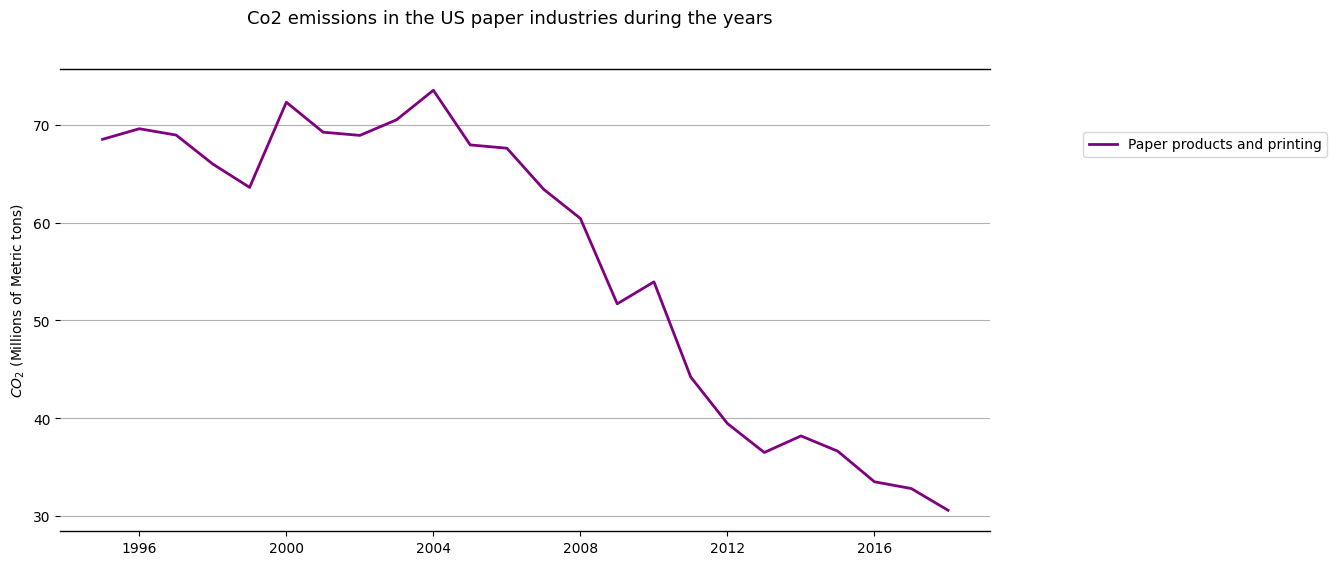

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Co2 emissions in the US paper industries during the years", fontsize=13)

# ax.set_title("Comparison between industrial services", fontsize=11)
ax.grid(which="major", axis="y")
ax.set_ylabel("$CO_2$ (Millions of Metric tons)")
# ax.yaxis.set_major_formatter(formatter) 

ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

# for col, ind in zip(colors, ind_list):
to_plot = to_plot_carbon.T.iloc[3:, 0]
x = pd.to_datetime(to_plot.index.str[1:])
y = to_plot.values
ax.plot(x, y, "-", label="Paper products and printing", linewidth=2.0, color="purple")    
ax.legend(loc=[1.1, 0.81]);


![alt text](https://m.media-amazon.com/images/M/MV5BNGE4YzI5M2MtZjYxZi00ZjI3LWI5MmUtZGQxOWEwZjg2MmVjXkEyXkFqcGdeQXVyMDgyNjA5MA@@._V1_.jpg "Title")